## Kraig Fernandes

# _From the ‘Iris’ dataset, predict the optimum number of clusters and represent it visually._

In [6]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [20]:
iris=datasets.load_iris()
data=iris.data
target=iris.target
target_names=iris.target_names

## _Exploratory Data Analysis_

In [24]:
import pandas as pd
data=pd.DataFrame(data,columns=iris.feature_names)

In [26]:
#Reading the data
data 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
data.shape

(150, 4)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


***No null values present***

In [41]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3>

***Data Visualization***

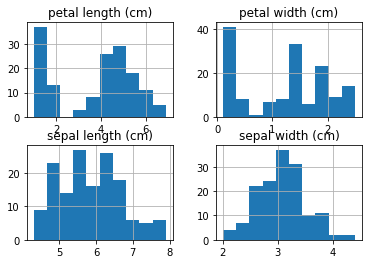

In [137]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

<h3>

# _Finding numbers of Clusters for Kmeans using Elbow Method_

In [99]:
x=data.iloc[:,0:4].values
cls=[] # Sum of cluster squares
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0).fit(x)
    cls.append(kmeans.inertia_)

### _Plotting the graph to derive the value of k_

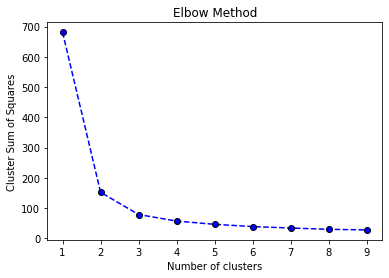

In [100]:
plt.plot(range(1, 10), cls, '--', color='blue',marker='o',markeredgecolor='black')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum of Squares') 
plt.show()

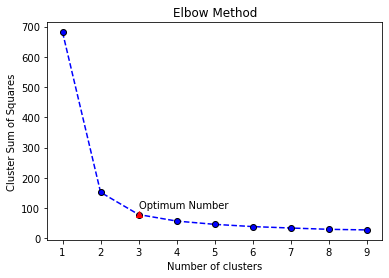

In [125]:
plt.plot(range(1, 10), cls, '--', color='blue',marker='o',markeredgecolor='black')
plt.annotate("Optimum Number",(3,100))
plt.plot(3, 80, 'r^')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum of Squares') 
plt.show()

### _According to the elbow method most accurate value for number of cluster is 3._

<h3>

# _Applying KMeans Cluster_

In [126]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [128]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

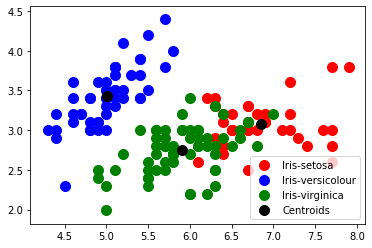

In [134]:
# Visualising the clusters, 3 types
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')

plt.legend()